---
<img src="../assets/grt_logo.png" style="float: left; margin: 20px; height: 55px">

# Garton Research & Trading

_August 19, 2019_

---

## Do yield curve inversions actually predict recessions?

**Context:** 'Yield curve inversions predict recessions' - in some form or another - is a statement repeated so often that even the most logical participants in financial markets take it as accepted wisdom. This project is my attempt to explore this statement with a higher degree of rigor than it usually receives. To start, I will look at all instances over the longest time period for which I can obtain data in which the yield curve inverted and compare to all recessions observed during that same time period. As a starting point, I will use the following definitions for *yield curve inversion* and *recession*:

    Yield curve inversion: Yield on the benchmard 10-year U.S. Treasury Note minus the yield on the 3-month U.S Treasury Bill is less than zero.

    Recession: "The series assigns dates to U.S. recessions based on a mathematical model of the way that recessions differ from expansions. Whereas the NBER business cycle dates are based on a subjective assessment of a variety of indicators, the dates here are entirely mechanical and are calculated solely from historically reported GDP data. Whenever the GDP-based recession indicator index rises above 67%, the economy is determined to be in a recession. The date that the recession is determined to have begun is the first quarter prior to that date for which the inference from the mathematical model using all data available at that date would have been above 50%. The next time the GDP-based recession indicator index falls below 33%, the recession is determined to be over, and the last quarter of the recession is the first quarter for which the inference from the mathematical model using all available data at that date would have been below 50%."


_Author: Matthew Garton_
    

**Source of recession indicator (and above description):**
Hamilton, James, Dates of U.S. recessions as inferred by GDP-based recession indicator [JHDUSRGDPBR], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/JHDUSRGDPBR, June 27, 2019.

In [1]:
# import necessary modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import quandl

In [2]:
# acquire data
yield_curve = quandl.get('USTREASURY/YIELD')
sp500 = quandl.get('MULTPL/SP500_REAL_PRICE_MONTH')
recessions = pd.read_csv('../data/Recessions.csv', header=0, names=['Date', 'Is Recession'])

In [3]:
# preprocess data
recessions['Date'] = pd.to_datetime(recessions['Date'])
recessions.set_index('Date', inplace=True)
recessions = recessions.resample('D').ffill()
recession_dates = recessions[recessions['Is Recession'] == 1.0].index

yield_curve['10yr-3mo'] = yield_curve['10 YR'] - yield_curve['3 MO']
yield_curve['5yr-2yr'] = yield_curve['5 YR'] - yield_curve['2 YR']
yield_curve.merge(recessions, on='Date')

sp500.rename(columns={'Value': 'sp500 Real Value'}, inplace=True)
sp500 = sp500.merge(recessions, on='Date')

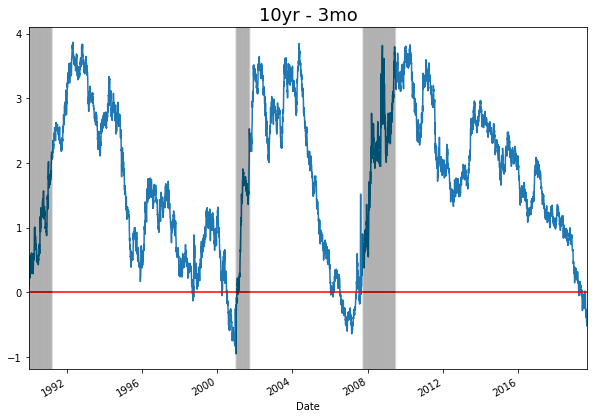

In [4]:
# Plot yield curve and recessions
yield_curve['10yr-3mo'].plot(figsize=(10,7))
plt.title('10yr - 3mo', fontsize=18)
plt.axhline(y=0, color='r')
for date in recession_dates:
    plt.axvline(date, color='k', alpha=0.01);

**Note:** The yield curve data provided by the U.S. Treasury (obtained from Quandl) is insufficient for analysis. With only three observations each of a recession and a yield curve inversion, not much can be said about the relationship - if there indeed is one - between the two.

Below, I extend my analysis using data obtained from the Federal Reserve Economic Database (St Louis Fed's FRED). Below is a link to the blog post which uses this data (the blog is from 2018 and discusses the same exact topic - I am essentially recreating their plot at this stage).

source: https://fredblog.stlouisfed.org/2018/10/the-data-behind-the-fear-of-yield-curve-inversions/

In [5]:
fred_data = pd.read_csv('../data/fredgraph.csv', skiprows=11, header=0, names=['Date', '10yr-1yr', '10yr-3mo'])
fred_data['Date'] = pd.to_datetime(fred_data['Date'])
fred_data.set_index('Date', inplace=True)
fred_data = fred_data.merge(recessions, on='Date')
fred_data.head()

,10yr-1yr,10yr-3mo,Is Recession
Date,,,
1967-10-01,0.11,0.92,0.0
1967-11-01,0.14,1.02,0.0
1967-12-01,-0.01,0.73,0.0
1968-01-01,0.10,0.53,0.0
1968-02-01,0.15,0.58,0.0


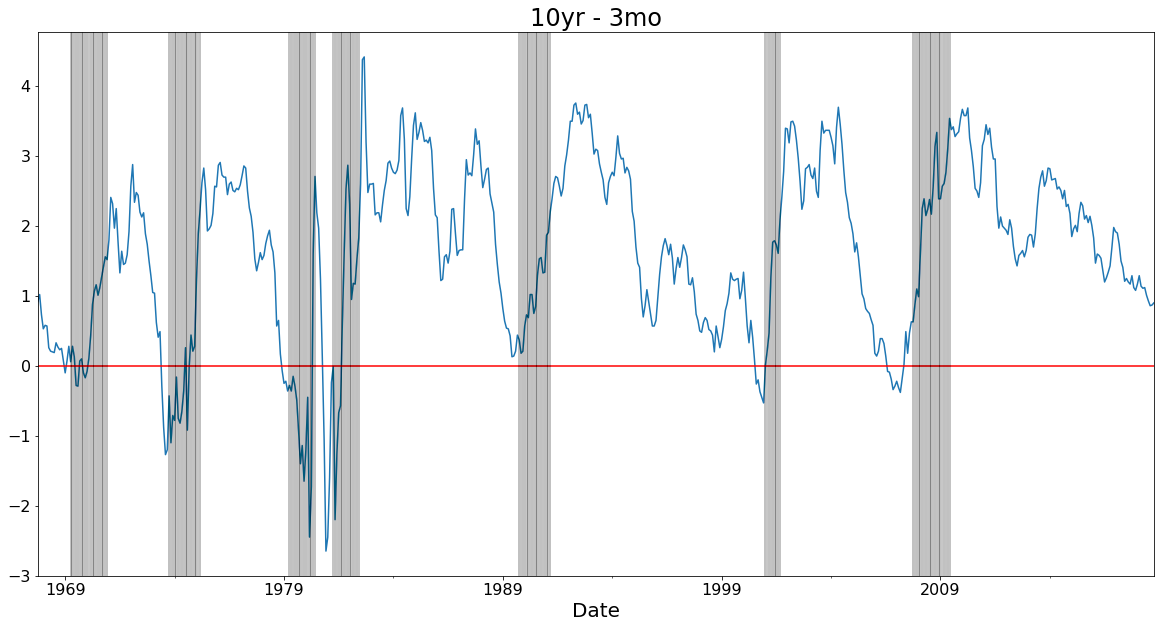

In [6]:
fred_data['10yr-3mo'].plot(figsize=(20,10))
plt.title('10yr - 3mo', fontsize=24)
plt.xlabel('Date', fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.axhline(y=0, color='r')
for date in recession_dates:
    plt.axvline(date, color='k', alpha=0.01);

### ...let's see what happens if I use the 10yr minus 1yr yield instead...

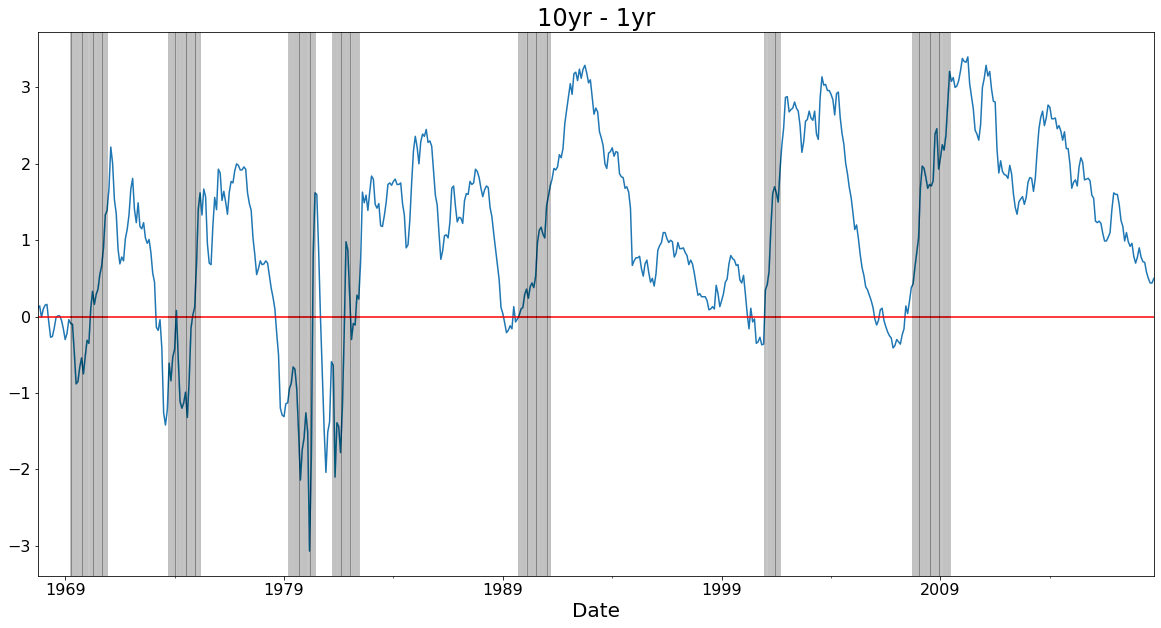

In [7]:
fred_data['10yr-1yr'].plot(figsize=(20,10))
plt.title('10yr - 1yr', fontsize=24)
plt.xlabel('Date', fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.axhline(y=0, color='r')
for date in recession_dates:
    plt.axvline(date, color='k', alpha=0.01);

### ...how about Fed Funds Rate and Recessions?

The reason why yield curve inversions are so interesting (aside from their track record at 'predicting' recessions) is that different segments of the yield curve are thought to be influenced by different factors. Broadly speaking, the 'long' end of the yield curve reflects market expectations of long-term growth and inflation, whereas the 'short' end of the yield curve is by and large controlled by the Federal Reserve (via their direct influence on short term interest rates - the Fed Funds rate to be precise.

The Fed Funds Rate is the Federal Reserves main tool for steering the economy, When the economy 'overheats' and higher inflation is the bigger risk, the Fed raises rates, slowing down growth to combat inflation. When the economy slows or contracts, the Fed will cut rates to try and stimulate growth.

In [8]:
# import fed funds data
fed_funds = pd.read_csv('../data/FEDFUNDS.csv', header=0, names=['Date', 'fed_funds'])

# preprocess data
fed_funds['Date'] = pd.to_datetime(fed_funds['Date'])
fed_funds.set_index('Date', inplace=True)
fed_funds = fed_funds.merge(recessions, on='Date')

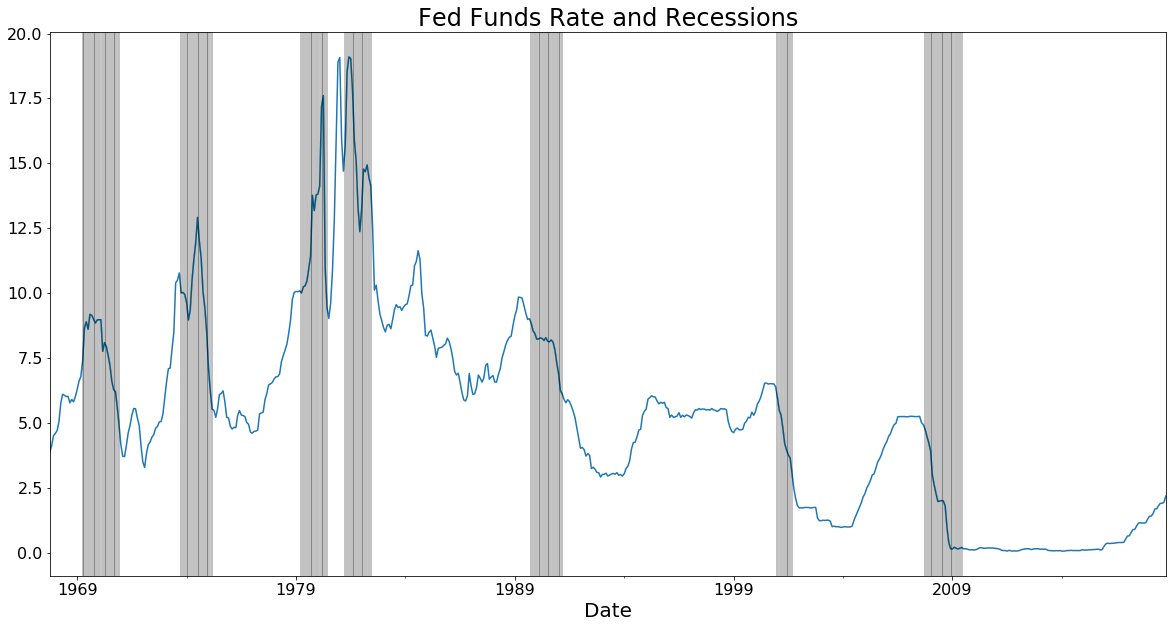

In [9]:
# plot fed funds with recessions
fed_funds['fed_funds'].plot(figsize=(20,10))
plt.title('Fed Funds Rate and Recessions', fontsize=24)
plt.xlabel('Date', fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
for date in recession_dates:
    plt.axvline(date, color='k', alpha=0.01);

### Relationship between S&P 500 and Recessions

While understanding the relationship between the yield curve and recessions is interesting, as an investor I am only indirectly interested in predicting recessions. What I really care about is predicting the overall direction of the stock market. If there is a clear relationship between downturns in the stock market and recessions, and I can predict recessions using the yield curve, then I may have a basis for buying, selling, or even shorting the stock market based on the shape of the yield curve. The stock market is generally considered a leading indicator of the overall economy, so I would expect downturns in the market to 

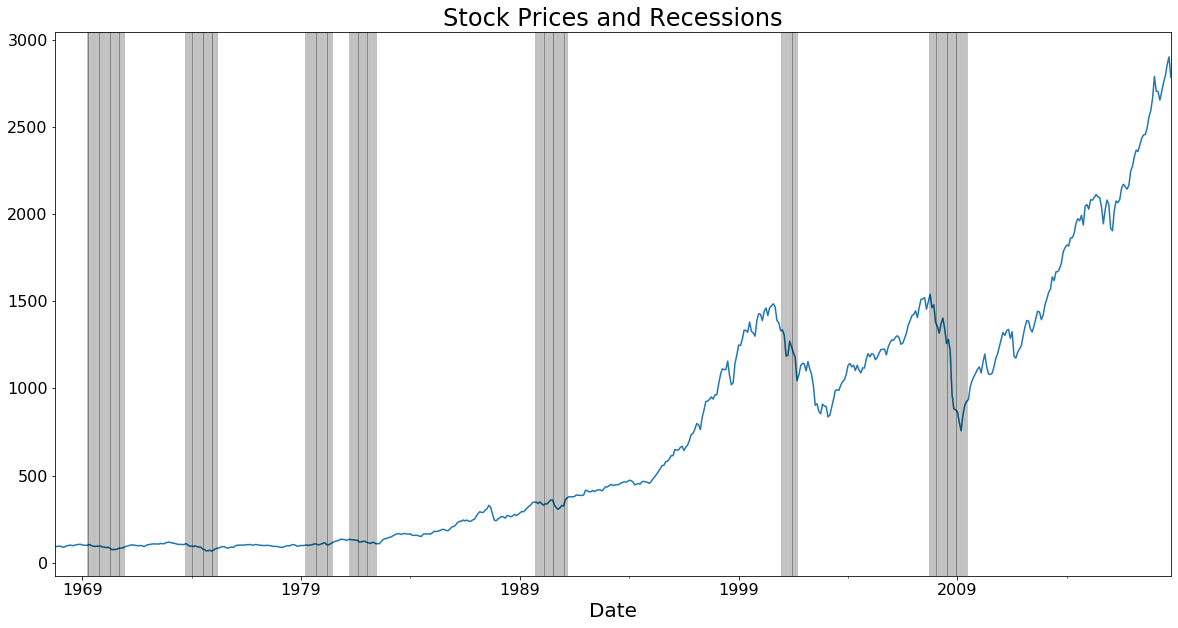

In [10]:
# plot sp500 with recessions
sp500['sp500 Real Value'].plot(figsize=(20,10))
plt.title('Stock Prices and Recessions', fontsize=24)
plt.xlabel('Date', fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
for date in recession_dates:
    plt.axvline(date, color='k', alpha=0.01);

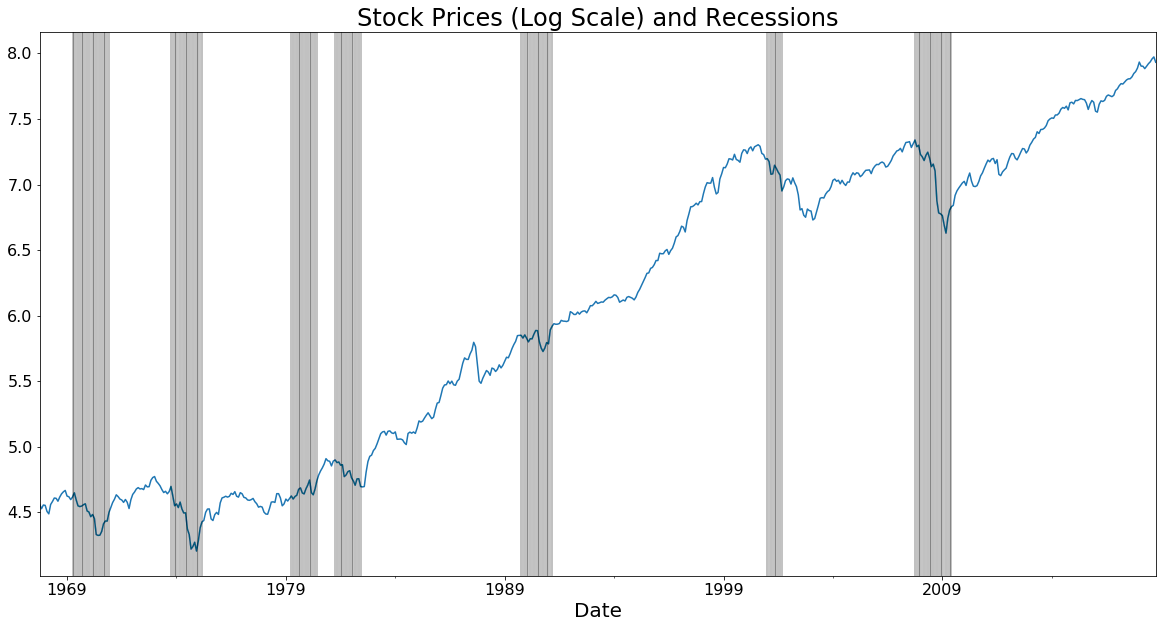

In [11]:
# plot sp500 with recessions (log scale)
sp500['sp500_log_real_value'] = np.log(sp500['sp500 Real Value'])

sp500['sp500_log_real_value'].plot(figsize=(20,10))
plt.title('Stock Prices (Log Scale) and Recessions', fontsize=24)
plt.xlabel('Date', fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
for date in recession_dates:
    plt.axvline(date, color='k', alpha=0.01);

### Adding other macroeconomic data

To add a level of rigor to the analysis, I incorporate the yield curve inversion data along with other macroeconomic indicators into a predictive model of recession. Here I make use of the [U.S. Macroeconomic data](https://www.statsmodels.org/dev/datasets/generated/macrodata.html) provided by `statsmodels` - quarterly data for key economic variables taken from the FRED database covering 1959 to 2009.

In [12]:
# data science and time series imports
import statsmodels.api as sm
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.base.datetools import dates_from_str
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# get the data
from statsmodels.datasets import macrodata
macro = sm.datasets.macrodata.load_pandas().data

# format the data for time series
macro['year'] = macro['year'].astype(int).astype(str)
macro['quarter'] = macro['quarter'].astype(int).astype(str)
date_idx = dates_from_str(macro['year'] + 'Q' + macro['quarter'])
macro.index = pd.DatetimeIndex(date_idx)

In [13]:
macro.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
1959-03-31,1959,1,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1959-06-30,1959,2,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
1959-09-30,1959,3,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
1959-12-31,1959,4,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
1960-03-31,1960,1,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


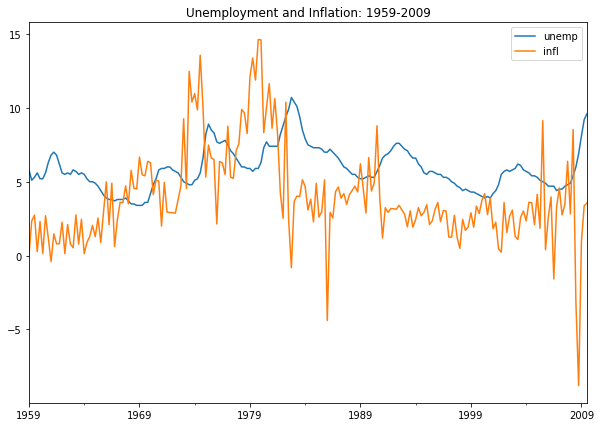

In [25]:
macro[['unemp', 'infl']].plot(title='Unemployment and Inflation: 1959-2009', figsize=(10,7));

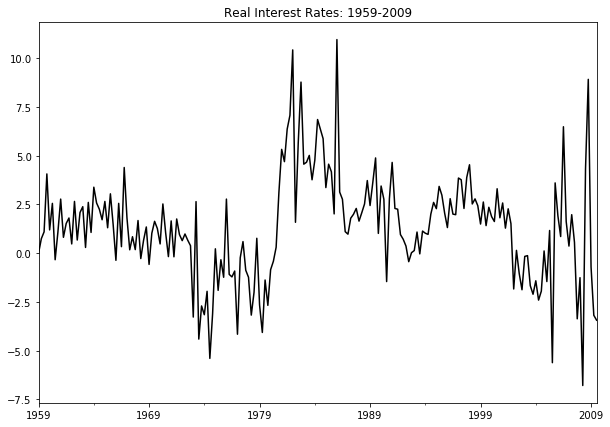

In [29]:
macro['realint'].plot(title='Real Interest Rates: 1959-2009', figsize=(10,7), color='k');

In [38]:
# merge in recession data
recessions_qtr = recessions.resample('Q').last()

In [44]:
recessions_qtr.head()

,Is Recession
Date,
1967-12-31,0.0
1968-03-31,0.0
1968-06-30,0.0
1968-09-30,0.0
1968-12-31,0.0


In [47]:
macro.index.rename('Date', inplace=True)

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
Date,,,,,,,,,,,,,,
1959-03-31,1959,1,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1959-06-30,1959,2,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
1959-09-30,1959,3,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
1959-12-31,1959,4,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
1960-03-31,1960,1,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [48]:
macro = macro.merge(recessions_qtr, on='Date')
macro.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint,Is Recession
Date,,,,,,,,,,,,,,,
1967-12-31,1967,4,3980.970,2465.7,462.834,640.234,2797.4,34.1,184.3,4.90,3.9,199.808,4.72,0.18,0.0
1968-03-31,1968,1,4063.013,2524.6,472.907,651.378,2846.2,34.4,186.6,5.18,3.7,200.208,3.50,1.67,0.0
1968-06-30,1968,2,4131.998,2563.3,492.026,646.145,2893.5,34.9,190.5,5.50,3.5,200.706,5.77,-0.28,0.0
1968-09-30,1968,3,4160.267,2611.5,476.053,640.615,2899.3,35.3,194.0,5.21,3.5,201.290,4.56,0.65,0.0
1968-12-31,1968,4,4178.293,2623.5,480.998,636.729,2918.4,35.7,198.7,5.85,3.4,201.760,4.51,1.34,0.0


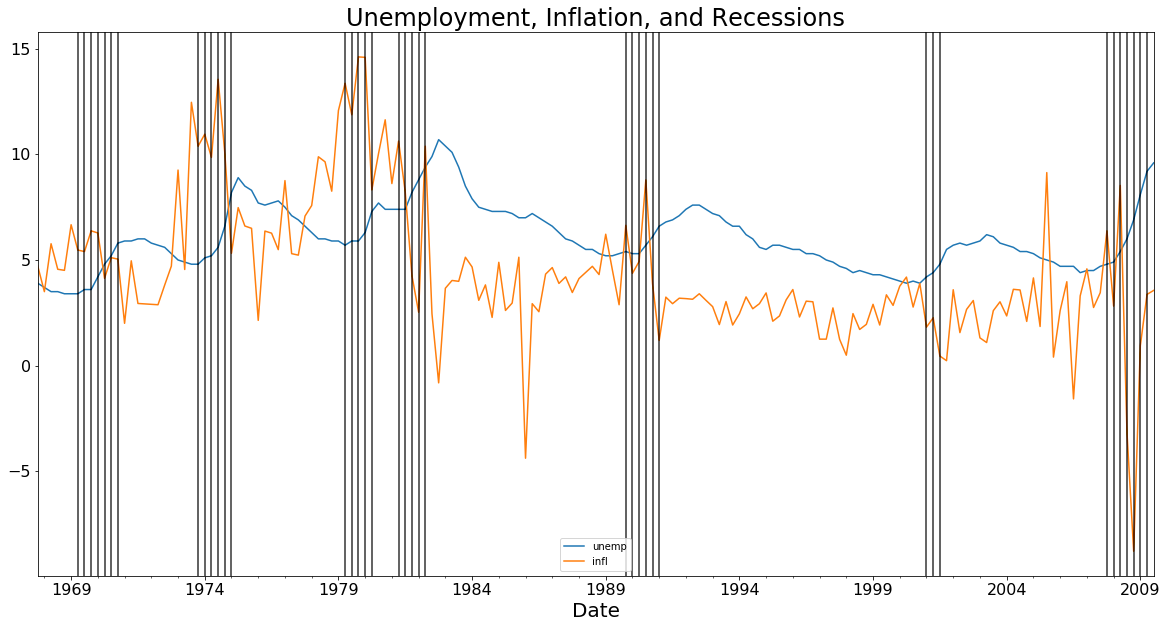

In [49]:
macro[['unemp', 'infl']].plot(figsize=(20,10))
plt.title('Unemployment, Inflation, and Recessions', fontsize=24)
plt.xlabel('Date', fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
for date in recession_dates:
    plt.axvline(date, color='k', alpha=0.01);

### Modeling steps

1. Transform data to achieve stationarity - gridsearch dickey-fuller for best value of $d$
2. Gridsearch for order of $p$
3. Train test split
4. Instantiate --> Fit --> Predict
5. Analyze

**Modeling Options**

* Predict gdp, stock market, unemp, infl
* Classify as regression or not
* Use yield curve inversion dummy or '10y-3mo' continuous

### Conclusions

The above analysis does not provide scientific evidence that yield curve inversions are reliable predictors of recessions. However, the anecdotal evidence is fairly strong. Taken together with other variables it is a useful indicator to suggest a higher risk of recession. Questions to evaluate in further analysis:

* What is the relationship between yield curve shape and recession risk (or economic growth) in general?
* Do these effects generalize to other countries?

All that can be said at this point is that yield curve inversion has at best anecdotal value as a predictor of recessions.

_-M. Garton_